In [446]:
"""
Colby Bailey
data science summer 2023
UTSA Student ID: nib667
""" 

'\nColby Bailey\ndata science summer 2023\nUTSA Student ID: nib667\n'

In [447]:
# All imports
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as pp

In [448]:
# TASK 1

In [449]:
# Extract file and list what was inside
zipfile.ZipFile( 'names.zip' ).extractall( '.' )
os.listdir( 'names' )

['yob2000.txt',
 'yob2014.txt',
 'yob1938.txt',
 'yob1910.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1911.txt',
 'yob1939.txt',
 'yob2001.txt',
 'yob2003.txt',
 'yob1907.txt',
 'yob1913.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1912.txt',
 'yob1906.txt',
 'yob2002.txt',
 'yob2012.txt',
 'yob2006.txt',
 'yob1902.txt',
 'yob1916.txt',
 'yob1889.txt',
 'yob1888.txt',
 'yob1917.txt',
 'yob1903.txt',
 'yob2007.txt',
 'yob2013.txt',
 'yob2005.txt',
 'yob2011.txt',
 'yob1915.txt',
 'yob1901.txt',
 'yob1929.txt',
 'yob1928.txt',
 'yob1900.txt',
 'yob1914.txt',
 'yob2010.txt',
 'yob2004.txt',
 'yob1973.txt',
 'yob1967.txt',
 'yob1998.txt',
 'yob1999.txt',
 'yob1966.txt',
 'yob1972.txt',
 'yob1958.txt',
 'yob1964.txt',
 'yob1970.txt',
 'yob1971.txt',
 'yob1965.txt',
 'yob1959.txt',
 'yob1961.txt',
 'yob1975.txt',
 'yob1949.txt',
 'yob1948.txt',
 'yob1974.txt',
 'yob1960.txt',
 'yob1976.txt',
 'yob1962.txt',
 'yob1989.txt',
 'yob1988.txt',
 'yob1963.txt',
 'yob1977.txt',
 'yob1952.txt',
 'yob194

In [450]:
"""
Loop through years. Read file name with formatted string literal. Read names
from file name into respective year and categories. Apply year to current, and
then append to allyears dataframe.
"""
allyears = []
for year in range( 1880, 2015 ):
    file = 'yob' + f'{ year }' + ".txt" 
    current = pd.read_csv( ( 'names/' + f'{ file }' ), names=[ 'name', 'sex', 'number' ] )
    current[ 'year' ] = year
    allyears.append( current )

In [451]:
# Concatinate all DataFrames into a single one and store in allyears
allyears = pd.concat( allyears )

In [452]:
# Output head of allyears DataFrame
allyears.head( )

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [453]:
# Output tail of allyears DataFrame
allyears.tail( )

,name,sex,number,year
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014
33043,Zyrin,M,5,2014


In [454]:
# TASK 2

In [455]:
"""
Sort the years by sex and name and them group them by calculating the sum
of the # column. Then use the unstack() method on the result by the
'sex' column to get # times each name was used per sex
"""

allyears_indexed = allyears.set_index( [ 'sex', 'name' ] ).sort_index( )
totals_bysex = allyears.groupby( [ 'sex', 'name' ] )[ 'number' ].sum( )
totals_bysex = totals_bysex.unstack( 'sex' )

In [456]:
# Output the first five rows of the resulting DataFrame
print( totals_bysex.head( 5 ) )

sex           F      M
name                  
Aaban       NaN   72.0
Aabha      21.0    NaN
Aabid       NaN    5.0
Aabriella  10.0    NaN
Aadam       NaN  196.0


In [457]:
# TASK 3

In [458]:
# A)

In [459]:
"""
Select the F and M columns from DataFrame and use sum() method to 
calculate the sum of each row. Then print the first 5 rows.
"""
totals_both = totals_bysex[ [ 'F', 'M' ] ].sum( axis = 1 )
totals_both.head( )

name
Aaban         72.0
Aabha         21.0
Aabid          5.0
Aabriella     10.0
Aadam        196.0
dtype: float64

In [460]:
# B)

In [461]:
# Divide column 'F' of DataFrame by column 'M' and output first 5 lines
ratio = totals_bysex[ 'F' ] / totals_bysex[ 'M' ]
ratio.head( )

name
Aaban       NaN
Aabha       NaN
Aabid       NaN
Aabriella   NaN
Aadam       NaN
dtype: float64

In [462]:
# C)

In [463]:
# Use unisex name formula on DataFrame and sort descending. Print top 10 names. 
totals_both = totals_both[ ( ratio > 0.25 ) & ( ratio < 4 ) ].sort_values( ascending = False )
totals_both.head( 10 )

name
Willie    593888.0
Jordan    479434.0
Taylor    416096.0
Leslie    376587.0
Jamie     350262.0
Angel     301425.0
Lee       291691.0
Jessie    274931.0
Marion    259549.0
Dana      243517.0
dtype: float64

In [464]:
# TASK 4

In [465]:
# INSTRUCTOR CODE
def plotname(sex,name):
    data = allyears_indexed.loc[sex,name]
    pp.plot(data.index,data.values)

In [466]:
# Apply set_index() method on allyears dataset and sort.
allyears_indexed = allyears.set_index( [ 'sex','name','year' ] ).sort_index( )

In [467]:
# Output dataset indexed and sorted
allyears_indexed

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5
...                    ...
M   Zytavious 2009       7
              2010       6
    Zyvion    2009       5
    Zyyon     2014       6
    Zzyzx     2010       5

[1825433 rows x 1 columns]

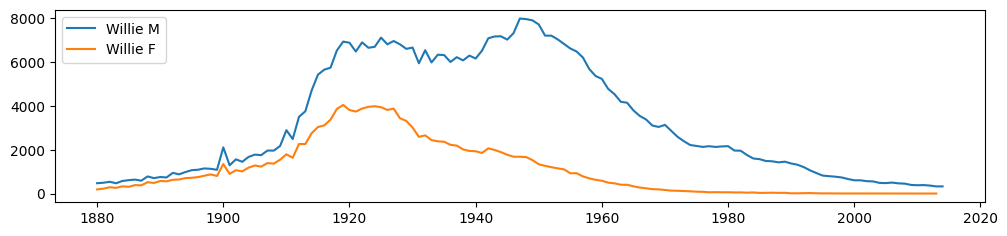

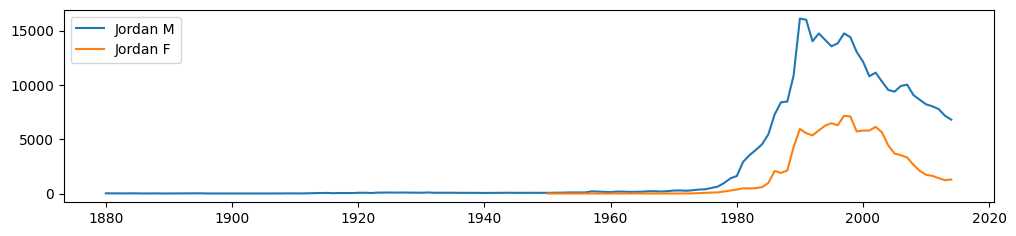

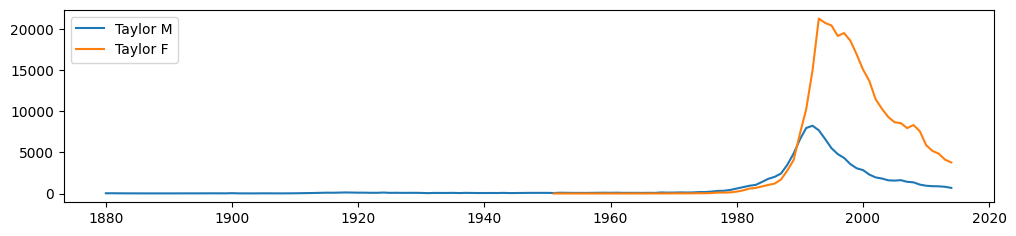

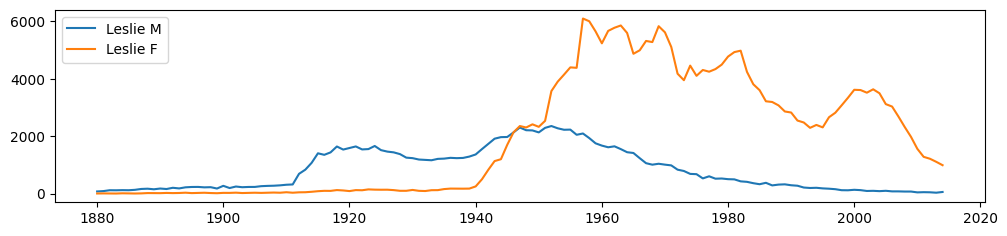

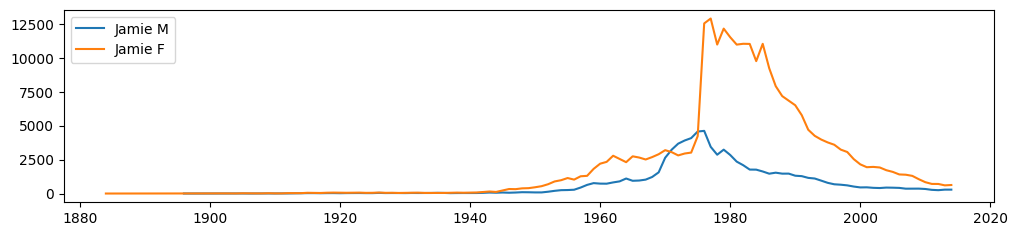

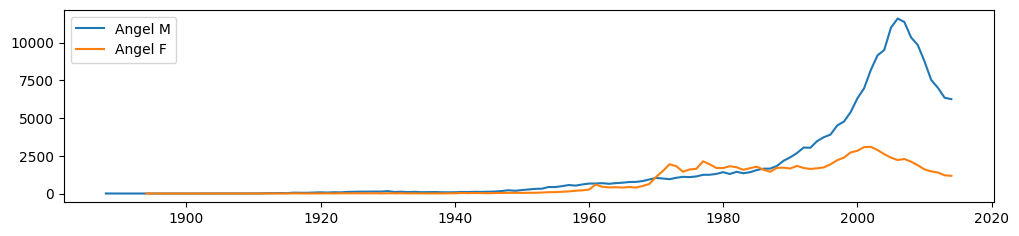

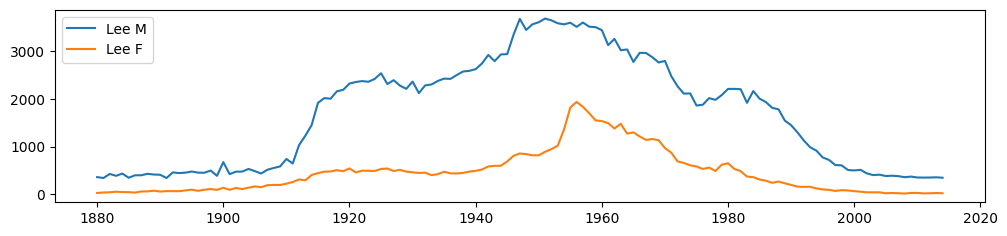

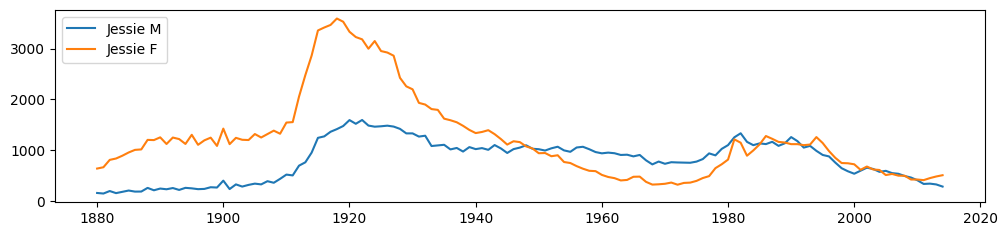

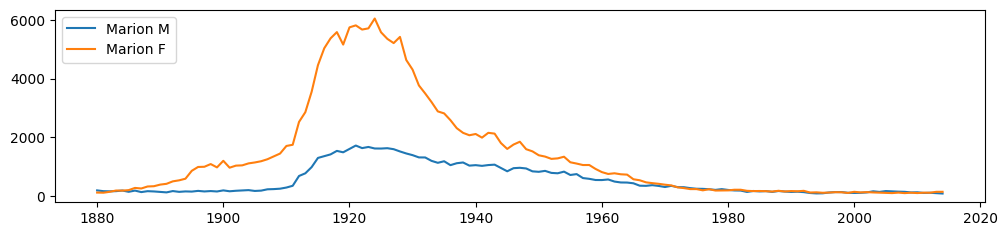

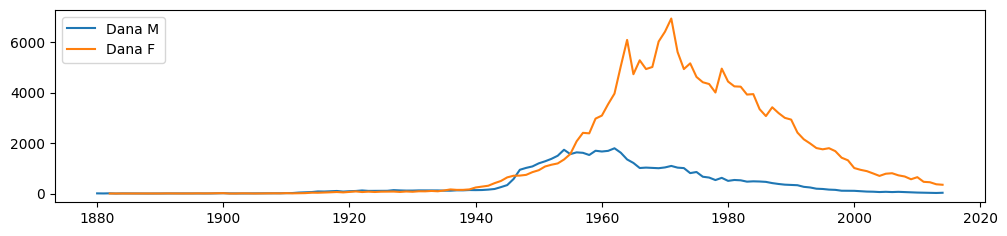

In [468]:
# for each name in the top 10, plot the M and F for each and their popularity over time
for name in totals_both.head( 10 ).index:
    pp.figure( figsize=( 12,2.5 ) )
    plotname( 'M', name )
    plotname( 'F', name )
    pp.legend( [ f"{ name } M", f"{ name } F" ], loc = 'upper left' )
    pp.show( )

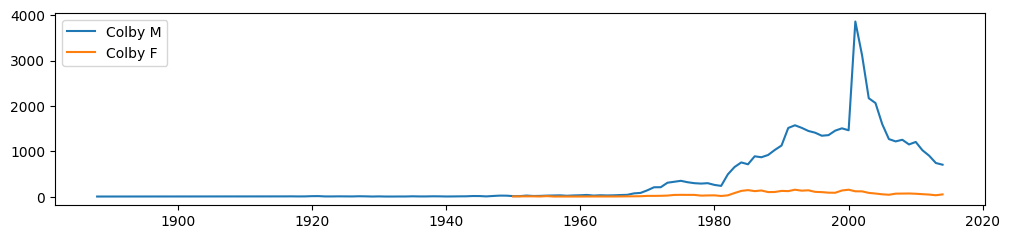

In [469]:
# Finding out what's going on with my own name haha
pp.figure( figsize=( 12,2.5 ) )
plotname( 'M', "Colby" )
plotname( 'F', "Colby" )
pp.legend( [ "Colby M", "Colby F" ], loc = 'upper left' )
pp.show( )